# Sim companies Exploratory Data Analysis

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing the data

#### The data is obtained form Sim Companies game, which is realistic market simulation game. It contains the daily transaction details of the company called Erbium Dragons. This includes Selling products, buying products, investing in bonds, other expenditures, etc.

- Our data is in CSV format.
- It contains 6 Columns; namely
    - id
    - Time stamp
    - Category
    - Money
    - Description
    - Details


In [3]:
df = pd.read_csv(r'sim_data.csv')

df.head()

,id,Timestamp,Category,Money,Description,Details
0,957668885,2022-11-17T04:38:07.959691+00:00,fees,-2793,Market fees selling High grade e-comps,{}
1,957668884,2022-11-17T04:38:07.956227+00:00,market,93090,High grade e-comps market order filled,"{""resource"": ""High grade e-comps"", ""amount"": 1..."
2,957605876,2022-11-17T03:32:29.226187+00:00,taxes,-24194,Accounting overhead,"{""Cash"": ""$844,206"", ""Investment in bonds"": ""$..."
3,957592241,2022-11-17T03:16:38.879745+00:00,market,14705,High grade e-comps market order filled,"{""resource"": ""High grade e-comps"", ""amount"": 1..."
4,957591345,2022-11-17T03:15:21.094580+00:00,market,865,High grade e-comps market order partially filled,"{""resource"": ""High grade e-comps"", ""amount"": 1..."


#### The CSV file contains 1804 rows. For the sake of simplicity in preliminary analysis we are going to drop some columns and change some columns;

1.  Id : It does not server much purpose, besides after loading the data into pandas data frame it would have ID or serial number.
2. Details : It is basically a dictionary; dropping it for the sake of simplicity.


In [4]:
df.drop(['id', 'Details'], axis=1, inplace=True)

df.head()

,Timestamp,Category,Money,Description
0,2022-11-17T04:38:07.959691+00:00,fees,-2793,Market fees selling High grade e-comps
1,2022-11-17T04:38:07.956227+00:00,market,93090,High grade e-comps market order filled
2,2022-11-17T03:32:29.226187+00:00,taxes,-24194,Accounting overhead
3,2022-11-17T03:16:38.879745+00:00,market,14705,High grade e-comps market order filled
4,2022-11-17T03:15:21.094580+00:00,market,865,High grade e-comps market order partially filled


#### We are going to change the following columns;

1. Time stamp : We are going to convert it into a datetime object.
2. Category : We are going to convert it into a category object.


In [5]:
df['Timestamp'] = pd.to_datetime(df.Timestamp, format='%Y-%m-%d %H:%M:%S')

df.head()

,Timestamp,Category,Money,Description
0,2022-11-17 04:38:07.959691+00:00,fees,-2793,Market fees selling High grade e-comps
1,2022-11-17 04:38:07.956227+00:00,market,93090,High grade e-comps market order filled
2,2022-11-17 03:32:29.226187+00:00,taxes,-24194,Accounting overhead
3,2022-11-17 03:16:38.879745+00:00,market,14705,High grade e-comps market order filled
4,2022-11-17 03:15:21.094580+00:00,market,865,High grade e-comps market order partially filled


In [6]:
# unique values in category column
unique_categories = df['Category'].unique()
print(*unique_categories, sep=" - ")


fees - market - taxes - production - interest - bonds - bond defaults - contract - game


#### If we look at the categories; we can observe that there are 8 categories; namely

1. Fees : A negative value, which is the amount of money spent on buying things and services.
2. Market : A positive value, which is the amount of money earned from selling products.
3. Taxes : A negative value, which is the amount of money spent on accounting and taxes.
4. Production : A negative value, which is the amount of money spent on production.
5. Interest : A positive value, which is the amount of money earned from interest on bonds.
6. Bonds : It can be either a positive or negative value, which is the amount of money spent on buying bonds or the amount of money earned from selling bonds.
7. Bond defaults : A positive value, which is the amount of money earned from defaulting bonds (bankruptcy).
8. Contract : A positive value, which is the amount of money earned from selling contracts.


In [7]:
df.loc[df['Category'] == "game"]

,Timestamp,Category,Money,Description
1470,2022-10-30 12:23:30.213457+00:00,game,5000,Achievement - Prospector


- The ``game`` column is irrelevant for our analysis, so we are going to drop it.

In [8]:
df.drop([1470], axis=0, inplace=True)

In [9]:
df.loc[df['Category'] == "game"]

,Timestamp,Category,Money,Description


In [10]:
unique_categories = df['Category'].unique()
print(*unique_categories, sep=" - ")

fees - market - taxes - production - interest - bonds - bond defaults - contract


In [11]:
# Converting the category column to categorical object
df['Category'] = df['Category'].astype('category')

print("\n ", df.dtypes)


  Timestamp      datetime64[ns, UTC]
Category                  category
Money                        int64
Description                 object
dtype: object


In [12]:
df.tail()

,Timestamp,Category,Money,Description
1799,2022-10-25 07:50:16.637877+00:00,bonds,-250000,Investment in bonds
1800,2022-10-25 07:47:43.556563+00:00,production,-31911,Production of Electronics research
1801,2022-10-25 07:47:07.117829+00:00,production,-67682,Production of Power
1802,2022-10-25 07:46:49.791052+00:00,production,-67682,Production of Power
1803,2022-10-25 07:45:09.769057+00:00,market,-33838,Bought Transport on market


#### Let us explore the data a bit more.

- We can see that the data is from 2022-10-25 to 2022-11-17.


In [13]:
spending = 0

for m in df['Money']:
    if m < 0:
        spending += m

print(f'Total spending: {-spending}')


Total spending: 21808731


In [14]:
earning = 0

for m in df['Money']:
    if m > 0:
        earning += m

print(f'Total earning : {earning}')

Total earning : 18339579


In [15]:
print(f'Total is : {-21808731 + 18344579}')

Total is : -3464152


**The weird thing is that the if we sum up the money column, we get a negative value. This is because the money column is not the total money of the company, but the money that was spent or earned in that particular transaction.**

In [16]:
# Highest spent amount
Highest_spent = float('inf')

for m in df['Money']:
    if m < 0:
        if m < Highest_spent:
            Highest_spent = m

print(f'Highest spent amount is {-Highest_spent}')

Highest spent amount is 700000


In [17]:
# Highest spent item
df.loc[df['Money'] == -700000]

,Timestamp,Category,Money,Description
68,2022-11-16 02:35:52.239249+00:00,market,-700000,Bought Crude oil on market


In [18]:
df.describe()

,Money
count,1803.000000
mean,-1924.099834
std,57557.068519
min,-700000.000000
25%,-2656.000000
50%,500.000000
75%,1250.000000
max,454400.000000


#### Let us visualize the data for a better understanding.

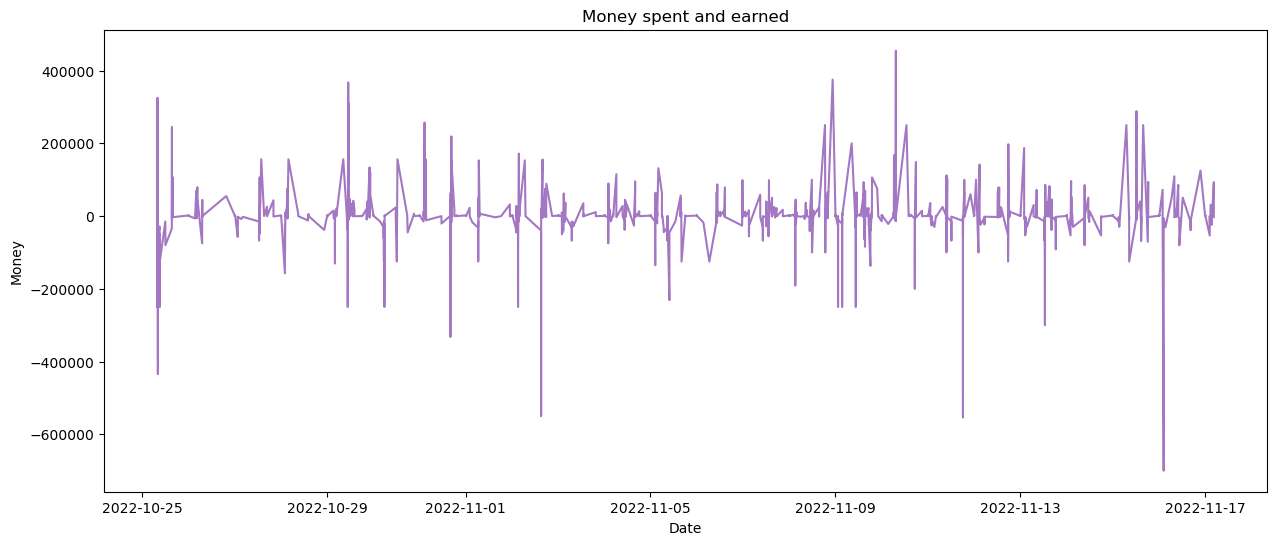

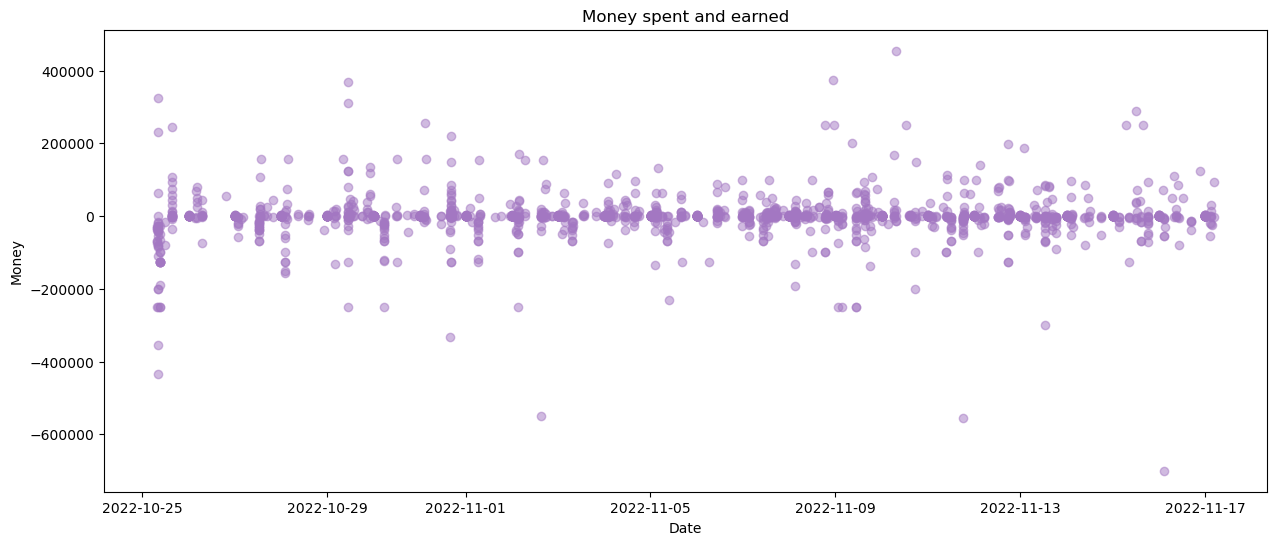

In [24]:
# vizualizing the data

# Plotting the data
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Money'], '-', color='#a377c2')
plt.xlabel('Date')
plt.ylabel('Money')
plt.title('Money spent and earned')
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(df['Timestamp'], df['Money'], c='#a377c2', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Money')
plt.title('Money spent and earned')
plt.show()


In [20]:
names = [x for x in df['Category'].unique()]


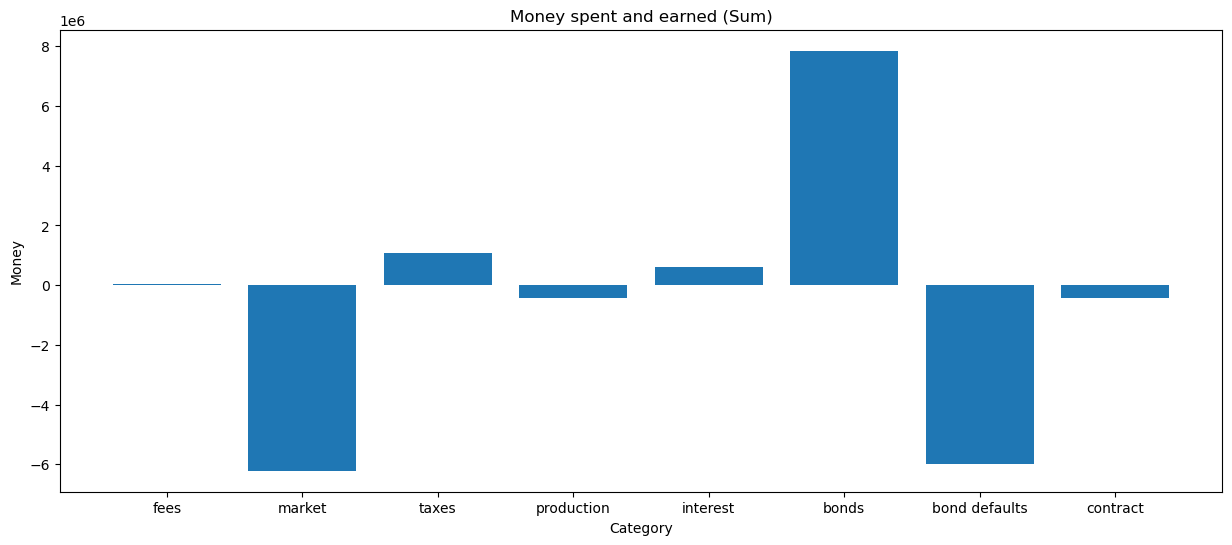

In [21]:
# plotting money against category
plt.figure(figsize=(15, 6))
plt.bar(names, df.groupby('Category')['Money'].sum())
plt.xlabel('Category')
plt.ylabel('Money')
plt.title('Money spent and earned (Sum)')
plt.show()


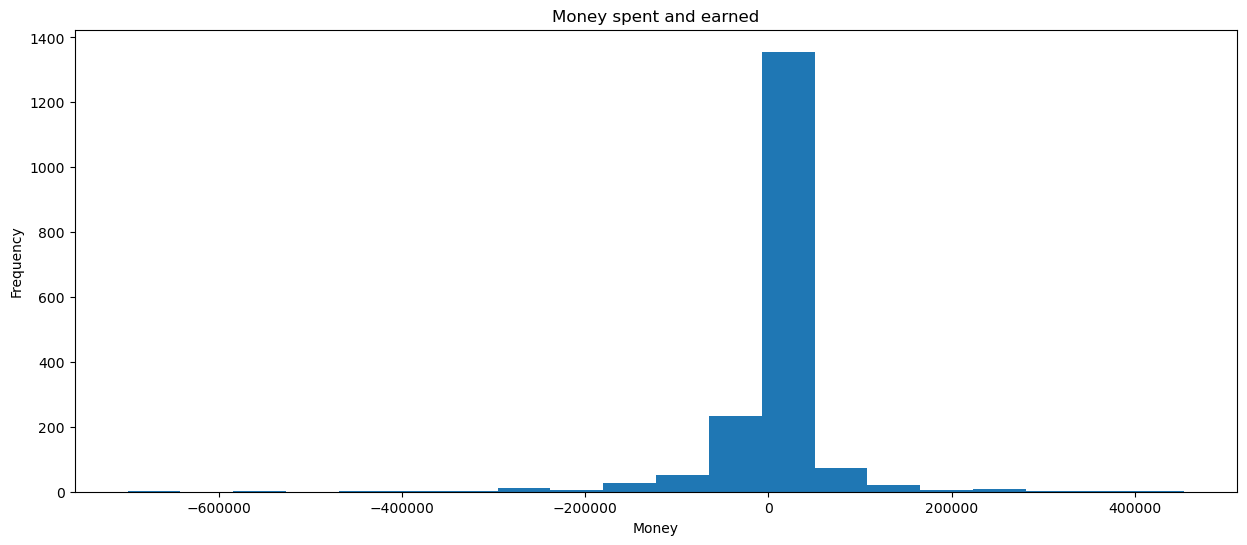

In [25]:
# histogram of money and category
plt.figure(figsize=(15, 6))
plt.hist(df['Money'], bins=20)
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.title('Money spent and earned')
plt.show()


#### From the money distribution plot we can see that the values are extreeemly skewed to the right. This is because of the negative values in the money column. This is because the money column shows the money spent or earned in that particular transaction. 

#### Let us analyze the data for each category. 

1. Fees


  

In [34]:
fees_data = df.loc[df['Category'] == 'fees']

fees_data.drop(['Description', 'Timestamp'], axis=1, inplace=True)

fees_data.head()


C:\Users\kanna\AppData\Local\Temp\ipykernel_18488\2485838112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_data.drop(['Description', 'Timestamp'], axis=1, inplace=True)


,Category,Money
0,fees,-2793
5,fees,-1402
53,fees,-1496
55,fees,-558
57,fees,-2670


In [37]:
# Converting the negative values of the money column to positive

fees_data['Money'] = fees_data['Money'].abs()

fees_data.head()

C:\Users\kanna\AppData\Local\Temp\ipykernel_18488\1254631612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_data['Money'] = fees_data['Money'].abs()


,Category,Money
0,fees,2793
5,fees,1402
53,fees,1496
55,fees,558
57,fees,2670


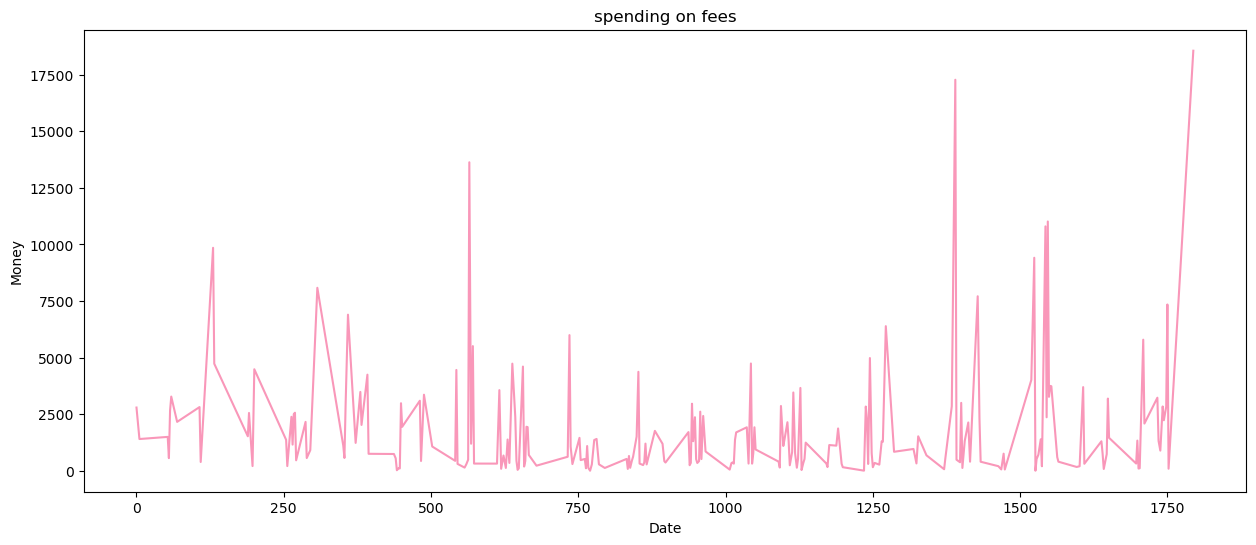

In [47]:
# ploting fees data

plt.figure(figsize=(15, 6))
plt.plot(fees_data['Money'], '-', color='#f997b9')
plt.xlabel('Date')
plt.ylabel('Money')
plt.title('spending on fees')
plt.show()
